In [ ]:
import os
import pandas as pd
import numpy as np

# **Creating a new timeline slice**

In [ ]:
# Define start and end times
start_time = pd.Timestamp('2023-06-19 06:00:00')
end_time = pd.Timestamp('2023-06-19 23:00:00')

# Create a DatetimeIndex with 5-minute intervals
time_index = pd.date_range(start=start_time, end=end_time, freq='5T')

# Create a DataFrame with the timeline column
dt = pd.DataFrame({'Timeline': time_index})
dt['time'] = dt['Timeline'].dt.time
dt.head()

Timeline      time
0 2023-06-19 06:00:00  06:00:00
1 2023-06-19 06:05:00  06:05:00
2 2023-06-19 06:10:00  06:10:00
3 2023-06-19 06:15:00  06:15:00
4 2023-06-19 06:20:00  06:20:00

# **Dropping the current timeline and adding the new one for all the files**

In [ ]:
# Getting rid of current timeline and adding a new one to all the data files
# Set the directory path
directory = '/content/Sensor_Data_T2'

# Get the list of files in the directory
files = os.listdir(directory)

# Iterate over each file in the directory
for file in files:
    # Check if the file is a xlsx file
    if file.endswith('.xlsx'):
        # Read the Excel file into a DataFrame
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path)

        # Drop the specified column from the DataFrame
        column_to_drop = 'timestamp(America/Chicago)'
        df = df.drop(column_to_drop, axis=1)
        # Add a new column to the DataFrame
        df['Timeline'] = dt['time']

        # Save the modified DataFrame back to the file
        df.to_excel(file_path, index=False)


# **Merging All Data**

In [ ]:
import pandas as pd
import os

files = [file for file in os.listdir('/content/Sensor_Data_T2')]

for file in files:
  print(file)


.ipynb_checkpoints
T2_Diagnostic2_Multi Vending Machince_Merged Data.xlsx
T2_Diagnostic2_Big Hall_Merged Data.xlsx
T2_Diagnostic2_Delta_Merged Data.xlsx
T2_Diagnostic2_Baggage Claim 3_Merged Data.xlsx
T2_Diagnostic2_United_Merged Data.xlsx
T2_Diagnostic2_China Airline_Merged Data.xlsx
T2_Diagnostic2_Information Center_Merged Data.xlsx
T2_Diagnostic2_Baggage Claim 1_Merged Data.xlsx


In [ ]:
directory = '/content/Sensor_Data_T2'

# Create an empty list to store the dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):  # Adjust the file extension if necessary
        file_path = os.path.join(directory, filename)
        df = pd.read_excel(file_path)
        dfs.append(df)

# Concatenate all the dataframes in the list
concatenated_df = pd.concat(dfs, ignore_index=True)

# Show the concatenated dataframe
print(concatenated_df)

             co2      humid    light   pm25      score      noise  temp(Â°F)  \
0     850.000000  52.300000  150.200  1.000  89.500000  62.500000  69.700000   
1     806.600000  59.300000  175.900  0.600  87.800000  65.900000  66.100000   
2     795.200000  58.900000  214.500  0.800  88.300000  64.000000  66.300000   
3     817.266667  56.833333  180.200  0.800  88.533333  64.133333  67.366667   
4     790.225000  58.775000  276.175  0.225  88.100000  64.125000  66.350000   
...          ...        ...      ...    ...        ...        ...        ...   
1635  573.800000  51.200000  201.100  0.900  95.300000  68.000000  72.100000   
1636  597.600000  52.000000  178.900  1.200  94.500000  71.700000  71.700000   
1637  657.000000  51.800000  163.900  1.000  93.500000  72.200000  71.900000   
1638  730.900000  52.200000  186.600  0.900  92.500000  78.700000  71.700000   
1639  703.100000  52.300000  202.900  1.000  93.000000  74.400000  71.400000   

          voc                     Space

In [ ]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   co2        1640 non-null   float64
 1   humid      1640 non-null   float64
 2   light      1640 non-null   float64
 3   pm25       1640 non-null   float64
 4   score      1640 non-null   float64
 5   noise      1640 non-null   float64
 6   temp(Â°F)  1640 non-null   float64
 7   voc        1640 non-null   float64
 8   Space      1640 non-null   object 
 9   Timeline   1640 non-null   object 
dtypes: float64(8), object(2)
memory usage: 128.2+ KB


In [ ]:
concatenated_df.Space.unique()

array(['T2_Multi Vending Machine', 'T2_Big Hall', 'T2_Delta',
       'T2_Baggage Claim 3', 'T2_United', 'T2_China Airline',
       'T2_Information Center', 'T2_Baggage Claim 1'], dtype=object)

In [ ]:
for col in df.columns:
    print(col)

co2
humid
light
pm25
score
noise
temp(Â°F)
voc
Space
Timeline


# **Creating describe for all files**

In [ ]:
df = concatenated_df

In [ ]:
# Create an empty dictionary to store the results
describe_results = {}

# Iterate over the columns and apply the describe() method
for column in df.columns:
    describe_results[column] = df.groupby('Space')[column].describe()

# Create a DataFrame for each column's describe results
rts = {column: pd.DataFrame(describe_results[column]).T for column in describe_results}

# Saving each DataFrame to separate files
for column, dt in rts.items():
    dt.to_csv(f'{column}_describe.csv', index=False)

In [ ]:
df.head()

co2      humid    light   pm25      score      noise  temp(Â°F)  \
0  850.000000  52.300000  150.200  1.000  89.500000  62.500000  69.700000   
1  806.600000  59.300000  175.900  0.600  87.800000  65.900000  66.100000   
2  795.200000  58.900000  214.500  0.800  88.300000  64.000000  66.300000   
3  817.266667  56.833333  180.200  0.800  88.533333  64.133333  67.366667   
4  790.225000  58.775000  276.175  0.225  88.100000  64.125000  66.350000   

       voc                     Space  Timeline  
0  196.500  T2_Multi Vending Machine  06:00:00  
1  114.300  T2_Multi Vending Machine  06:05:00  
2   81.200  T2_Multi Vending Machine  06:10:00  
3   44.175  T2_Multi Vending Machine  06:15:00  
4   34.050  T2_Multi Vending Machine  06:20:00

In [ ]:
temp_sum = df.groupby('Space')['temp(Â°F)'].describe()

In [ ]:
temp_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, T2_Baggage Claim 1 to T2_United
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   8 non-null      float64
 1   mean    8 non-null      float64
 2   std     8 non-null      float64
 3   min     8 non-null      float64
 4   25%     8 non-null      float64
 5   50%     8 non-null      float64
 6   75%     8 non-null      float64
 7   max     8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [ ]:
df.to_excel('/content/data.xlsx')

# **Subplots**

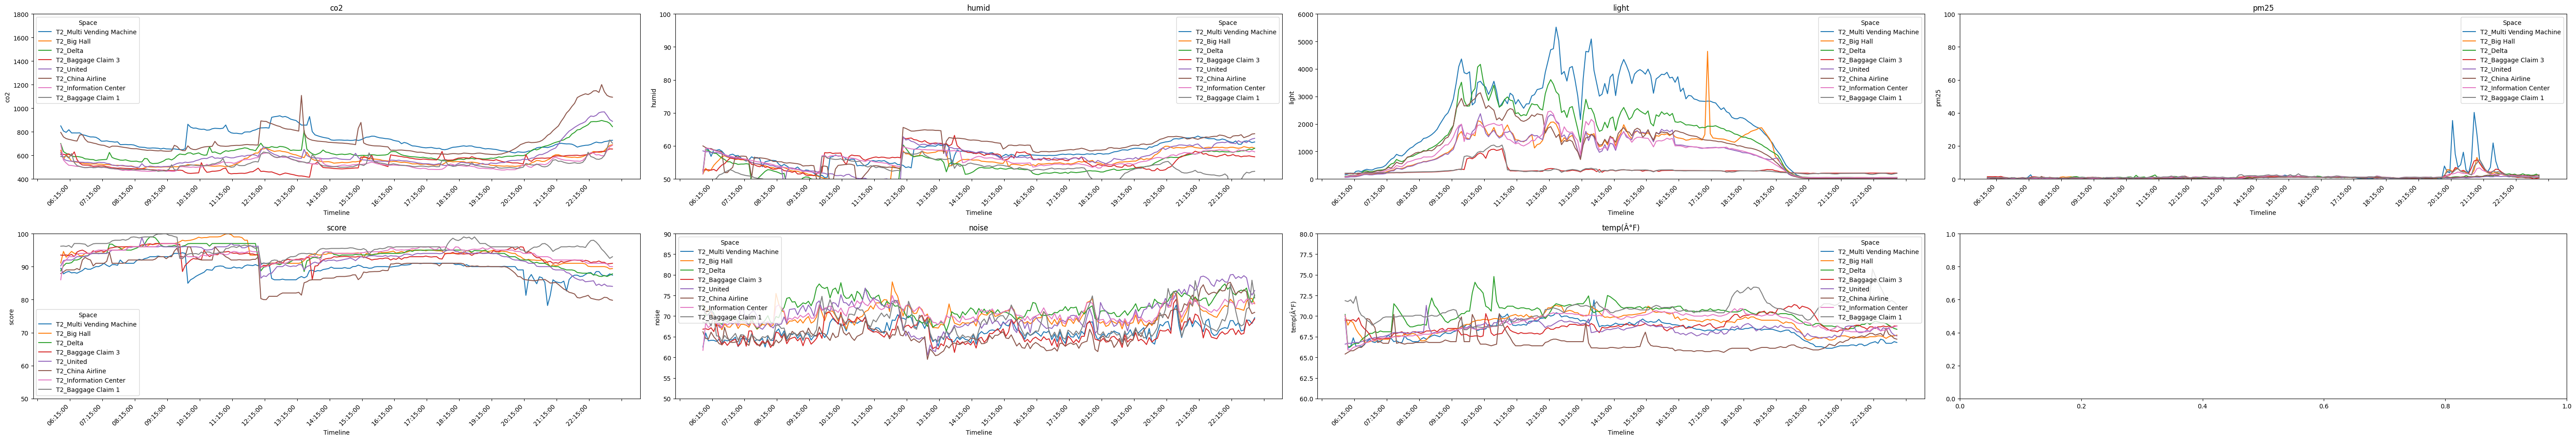

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()


# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the line plot for each variable
    sns.lineplot(data=df, x='Timeline', y=variable, hue='Space', ax=ax)

    # Set the x-axis format to show dates and hours
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=288))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))



    ax.set_title(variable)
    ax.set_xlabel('Timeline')
    ax.set_ylabel(variable)

    # Rotate the x-axis tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    # Set specific y-limits for each plot (adjust the values as needed)
    if variable == 'co2':
        ax.set_ylim(400, 1800)
    elif variable == 'humid':
        ax.set_ylim(50, 100)
    elif variable == 'light':
        ax.set_ylim(0, 6000)
    elif variable == 'pm25':
        ax.set_ylim(0, 100)
    elif variable == 'score':
        ax.set_ylim(50, 100)
    elif variable == 'noise':
        ax.set_ylim(50, 90)
    elif variable == 'temp(Â°F)':
        ax.set_ylim(60, 80)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

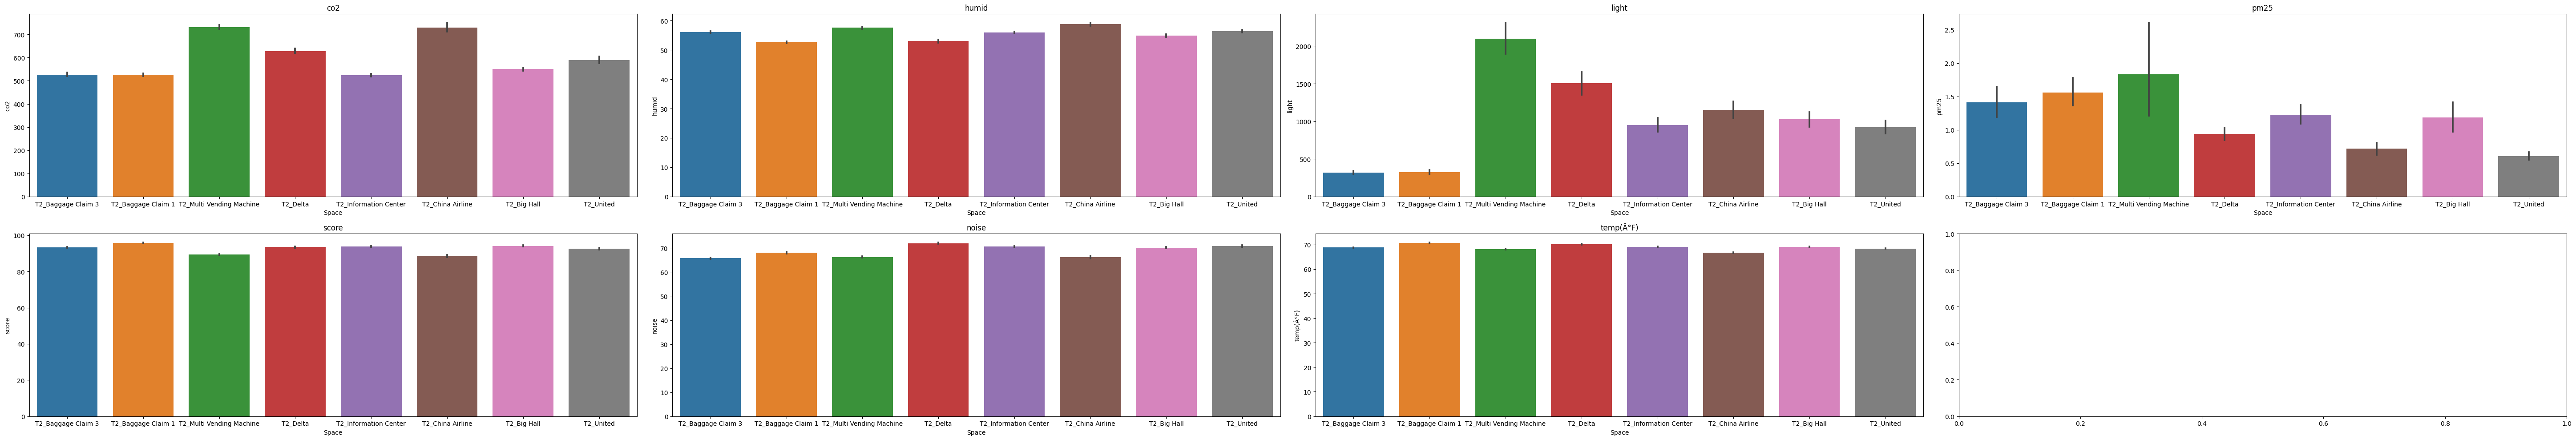

In [ ]:
# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the bar plot for each variable
    sns.barplot(x='Space', y=variable, data=df, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Space')
    ax.set_ylabel(variable)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-19-bf4104afdbc2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

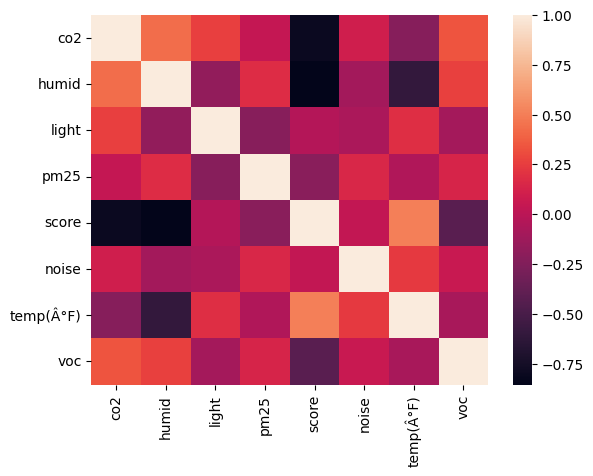

In [ ]:
# finding the correlation
corr = df.corr()
sns.heatmap(corr)

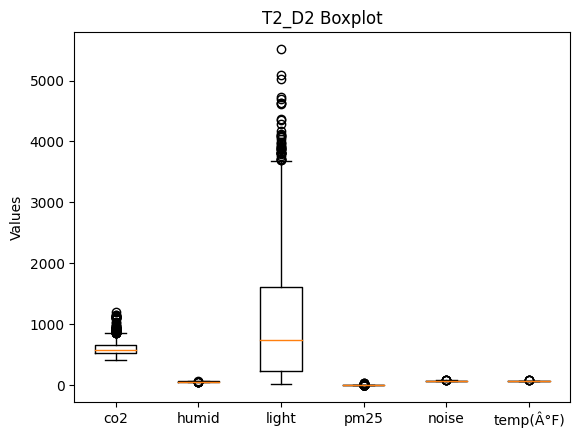

In [ ]:
columns_to_plot = ['co2', 'humid', 'light', 'pm25','noise', 'temp(Â°F)']
subset_df = df[columns_to_plot]
# Create the boxplot
plt.boxplot(subset_df.values)
plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
plt.ylabel('Values')
plt.title('T2_D2 Boxplot')
plt.show()

# **Detect High Values_CO2**

In [ ]:
#Detect High Values
loi = np.where(df["co2"]>1000)[0]
dCO2_1 = df["Timeline"][loi]
dCO2_2 = df["co2"][loi]
dCO2_3 = df["Space"][loi]

In [ ]:
r= df
# Create a new column "loi" based on the condition
r["loi"] = np.where(r["co2"] > 1000, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_r = r[r["loi"] == 1]

In [ ]:
High_value_r

co2  humid   light  pm25  score  noise  temp(Â°F)    voc  \
1114  1108.6   57.7  1494.2   0.5  81.35  61.55       69.2  531.3   
1214  1014.9   62.9    12.7   2.2  82.00  75.80       67.4   89.2   
1215  1041.8   62.9    12.4   3.2  81.70  75.50       67.5   87.7   
1216  1090.4   63.3    13.4   2.9  80.60  76.50       67.6   98.1   
1217  1103.4   63.2    14.1   2.2  80.50  76.10       67.5  106.3   
1218  1113.2   63.0    13.8   2.3  80.80  76.20       67.7  110.3   
1219  1122.2   62.6    13.7   2.6  81.00  77.90       67.9  107.8   
1220  1116.3   62.4    14.2   2.3  81.30  78.20       67.9  104.2   
1221  1128.1   63.0    13.8   2.3  80.40  76.80       67.7  109.5   
1222  1146.9   63.1    12.9   2.2  80.20  75.30       67.8  110.4   
1223  1148.5   63.1    12.3   2.1  80.00  76.00       67.9  114.4   
1224  1134.0   63.4    11.7   2.3  79.90  75.60       67.6  115.5   
1225  1200.6   62.5     9.2   1.8  80.20  76.40       68.5  122.7   
1226  1140.4   62.8    15.8   2.0  80.70  75.90       67.8  119.9   
1227  1108.7   63.1    16.4   1.9  80.60  72.00       67.6  121.7   
1228  1097.5   63.6    14.8   2.2  80.00  70.60       67.3  130.8   
1229  1093.4   63.7    14.1   2.4  79.80  70.90       67.2  139.3   

                 Space            Timeline  loi  
1114  T2_China Airline 2023-06-19 13:25:00    1  
1214  T2_China Airline 2023-06-19 21:45:00    1  
1215  T2_China Airline 2023-06-19 21:50:00    1  
1216  T2_China Airline 2023-06-19 21:55:00    1  
1217  T2_China Airline 2023-06-19 22:00:00    1  
1218  T2_China Airline 2023-06-19 22:05:00    1  
1219  T2_China Airline 2023-06-19 22:10:00    1  
1220  T2_China Airline 2023-06-19 22:15:00    1  
1221  T2_China Airline 2023-06-19 22:20:00    1  
1222  T2_China Airline 2023-06-19 22:25:00    1  
1223  T2_China Airline 2023-06-19 22:30:00    1  
1224  T2_China Airline 2023-06-19 22:35:00    1  
1225  T2_China Airline 2023-06-19 22:40:00    1  
1226  T2_China Airline 2023-06-19 22:45:00    1  
1227  T2_China Airline 2023-06-19 22:50:00    1  
1228  T2_China Airline 2023-06-19 22:55:00    1  
1229  T2_China Airline 2023-06-19 23:00:00    1

In [ ]:
High_value_r .to_excel("T2_CO2_High.xlsx",
             sheet_name='Sheet_name_1')

# **Detect High Values_Noise**

In [ ]:
E_T2= df
# Create a new column "loi" based on the condition
E_T2["loi"] = np.where(E_T2["noise"] > 70, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_E_T2 = E_T2[E_T2["loi"] == 1]

In [ ]:
High_value_E_T2

co2  humid  light  pm25  score  noise  temp(Â°F)    voc      Space  \
0     700.2   51.6   87.5   0.7   88.7   72.6       70.2  686.4   T2_Delta   
2     616.8   58.6  130.9   0.8   91.0   70.4       66.3   40.4   T2_Delta   
3     607.6   58.1  127.2   0.2   91.0   71.4       66.6   22.0   T2_Delta   
4     596.8   57.8  138.8   0.2   91.2   70.7       66.7   20.4   T2_Delta   
24    562.0   52.8  810.2   0.2   95.0   70.1       68.7   20.0   T2_Delta   
...     ...    ...    ...   ...    ...    ...        ...    ...        ...   
1635  967.9   61.3   39.1   1.7   84.2   79.8       68.4  106.1  T2_United   
1636  969.0   61.0   38.8   1.4   84.7   79.3       68.6  105.0  T2_United   
1637  938.5   61.7   40.2   1.0   84.1   76.3       68.0  104.2  T2_United   
1638  903.7   62.1   40.8   1.4   84.1   75.1       67.7  101.0  T2_United   
1639  888.5   62.3   40.2   1.4   84.0   76.2       67.6   99.1  T2_United   

      Timeline  loi  
0     06:00:00    1  
2     06:10:00    1  
3     06:15:00    1  
4     06:20:00    1  
24    08:00:00    1  
...        ...  ...  
1635  22:40:00    1  
1636  22:45:00    1  
1637  22:50:00    1  
1638  22:55:00    1  
1639  23:00:00    1  

[566 rows x 11 columns]

In [ ]:
High_value_E_T2 .to_excel("T2_Noise_High.xlsx",
             sheet_name='Sheet_name_1')

# **T4_D1**

In [ ]:
# Define start and end times
start_time = pd.Timestamp('2023-06-19 06:00:00')
end_time = pd.Timestamp('2023-06-19 23:00:00')

# Create a DatetimeIndex with 5-minute intervals
time_index = pd.date_range(start=start_time, end=end_time, freq='5T')

# Create a DataFrame with the timeline column
dt_2 = pd.DataFrame({'Timeline': time_index})
dt_2['time'] = dt_2['Timeline'].dt.time
dt_2.head()

Timeline      time
0 2023-06-19 06:00:00  06:00:00
1 2023-06-19 06:05:00  06:05:00
2 2023-06-19 06:10:00  06:10:00
3 2023-06-19 06:15:00  06:15:00
4 2023-06-19 06:20:00  06:20:00

In [ ]:
# Getting rid of current timeline and adding a new one to all the data files
# Set the directory path
directory = '/content/Sensor_Data_T4_D1'

# Get the list of files in the directory
files = os.listdir(directory)

# Iterate over each file in the directory
for file in files:
    # Check if the file is a xlsx file
    if file.endswith('.xlsx'):
        # Read the Excel file into a DataFrame
        file_path = os.path.join(directory, file)
        df_T4_D1 = pd.read_excel(file_path)

        # Drop the specified column from the DataFrame
        column_to_drop = 'timestamp(America/Chicago)'
        df_T4_D1 = df_T4_D1.drop(column_to_drop, axis=1)
        # Add a new column to the DataFrame
        df_T4_D1['Timeline'] = dt_2['time']

        # Save the modified DataFrame back to the file
        df_T4_D1.to_excel(file_path, index=False)


In [ ]:
import pandas as pd
import os

files = [file for file in os.listdir('/content/Sensor_Data_T4_D1')]

for file in files:
  print(file)


T4_Diagnostic1_Gate 403_Merged Data.xlsx
.ipynb_checkpoints
T4_Diagnostic1_Gate 404_Merged Data.xlsx
T4_Diagnostic1_Gate 402_Merged Data.xlsx
T4_Diagnostic1_Stairs_Merged Data.xlsx
T4_Diagnostic1_Elevator_Merged Data.xlsx
T4_Diagnostic1_Hallway_Merged Data.xlsx


In [ ]:
directory = '/content/Sensor_Data_T4_D1'

# Create an empty list to store the dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):  # Adjust the file extension if necessary
        file_path = os.path.join(directory, filename)
        df_T4_D1 = pd.read_excel(file_path)
        dfs.append(df_T4_D1)

# Concatenate all the dataframes in the list
concatenated_df_T4_D1= pd.concat(dfs, ignore_index=True)

# Show the concatenated dataframe
print(concatenated_df_T4_D1)

             co2      humid   light      pm25      score      noise  \
0     567.500000  60.100000  213.45  1.000000  92.000000  64.500000   
1     552.500000  61.350000  222.40  1.000000  91.500000  64.850000   
2     545.600000  59.200000  207.30  1.000000  92.000000  63.900000   
3     501.400000  61.000000  219.60  1.000000  92.000000  65.100000   
4     486.600000  61.700000  225.20  1.000000  91.000000  64.600000   
...          ...        ...     ...       ...        ...        ...   
1225  468.546875  50.868750   62.80  5.903125  97.131250  64.028125   
1226  468.426562  50.865625   62.80  5.898438  97.134375  64.035938   
1227  468.486719  50.867188   62.80  5.900781  97.132812  64.032031   
1228  468.456641  50.866406   62.80  5.899609  97.133594  64.033984   
1229  468.471680  50.866797   62.80  5.900195  97.133203  64.033008   

      temp(Â°F)        voc        Space  Timeline  
0     67.250000  20.000000  T4_Gate 403  06:00:00  
1     66.650000  20.000000  T4_Gate 403  06

In [ ]:
concatenated_df_T4_D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   co2        1230 non-null   float64
 1   humid      1230 non-null   float64
 2   light      1230 non-null   float64
 3   pm25       1230 non-null   float64
 4   score      1230 non-null   float64
 5   noise      1230 non-null   float64
 6   temp(Â°F)  1230 non-null   float64
 7   voc        1230 non-null   float64
 8   Space      1230 non-null   object 
 9   Timeline   1230 non-null   object 
dtypes: float64(8), object(2)
memory usage: 96.2+ KB


In [ ]:
concatenated_df_T4_D1.Space.unique()

array(['T4_Gate 403', 'T4_Gate 404', 'T4_Gate 402', 'T4_Stairs',
       'T4_Elevator', 'T4_Hallway'], dtype=object)

In [ ]:
for col in df_T4_D1.columns:
    print(col)

co2
humid
light
pm25
score
noise
temp(Â°F)
voc
Space
Timeline


In [ ]:
df_T4_D1 = concatenated_df_T4_D1

In [ ]:
# Create an empty dictionary to store the results
describe_results = {}

# Iterate over the columns and apply the describe() method
for column in df_T4_D1.columns:
    describe_results[column] = df_T4_D1.groupby('Space')[column].describe()

# Create a DataFrame for each column's describe results
rts = {column: pd.DataFrame(describe_results[column]).T for column in describe_results}

# Saving each DataFrame to separate files
for column, dt_2 in rts.items():
    dt_2.to_csv(f'{column}_describe.csv', index=False)

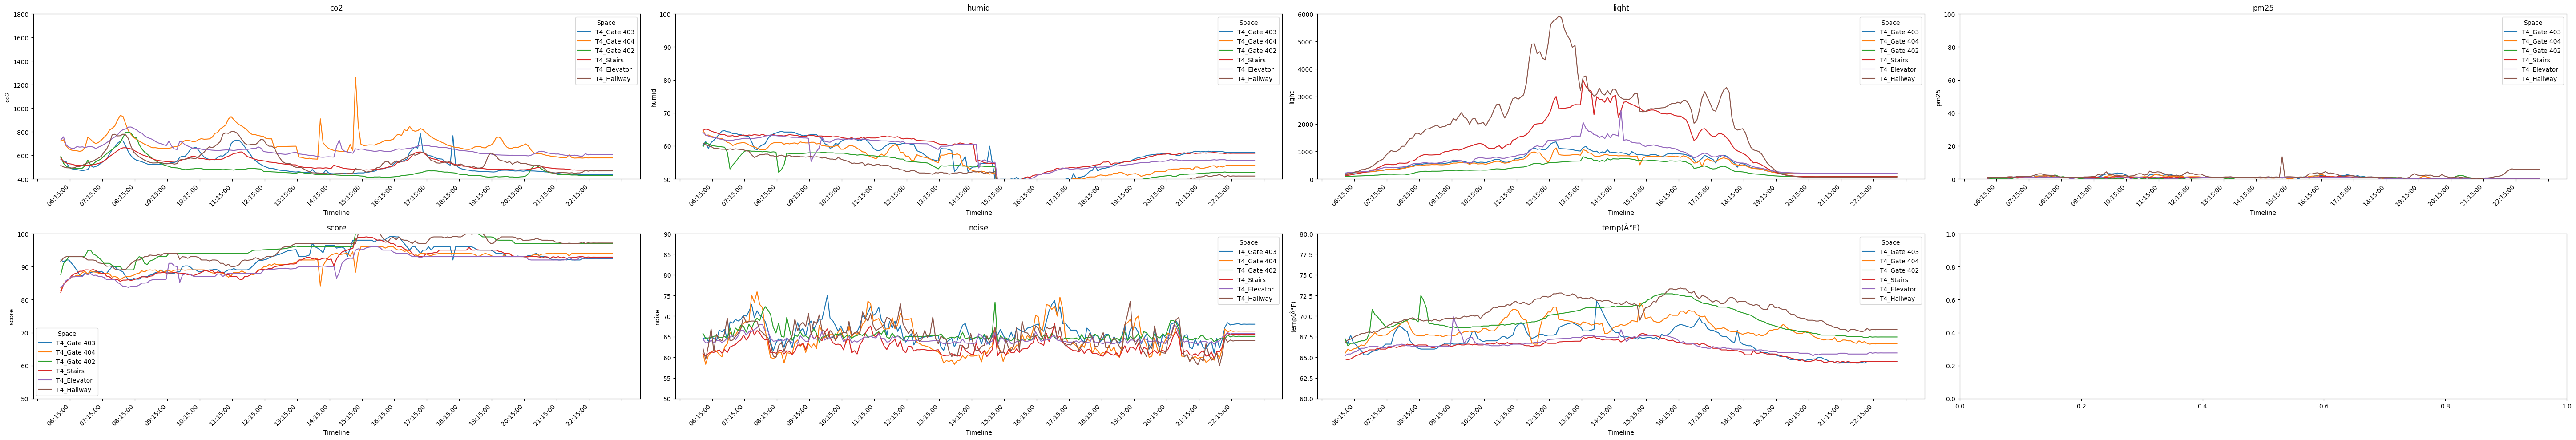

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()


# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the line plot for each variable
    sns.lineplot(data=df_T4_D1, x='Timeline', y=variable, hue='Space', ax=ax)

    # Set the x-axis format to show dates and hours
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=288))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))



    ax.set_title(variable)
    ax.set_xlabel('Timeline')
    ax.set_ylabel(variable)

    # Rotate the x-axis tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    # Set specific y-limits for each plot (adjust the values as needed)
    if variable == 'co2':
        ax.set_ylim(400, 1800)
    elif variable == 'humid':
        ax.set_ylim(50, 100)
    elif variable == 'light':
        ax.set_ylim(0, 6000)
    elif variable == 'pm25':
        ax.set_ylim(0, 100)
    elif variable == 'score':
        ax.set_ylim(50, 100)
    elif variable == 'noise':
        ax.set_ylim(50, 90)
    elif variable == 'temp(Â°F)':
        ax.set_ylim(60, 80)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

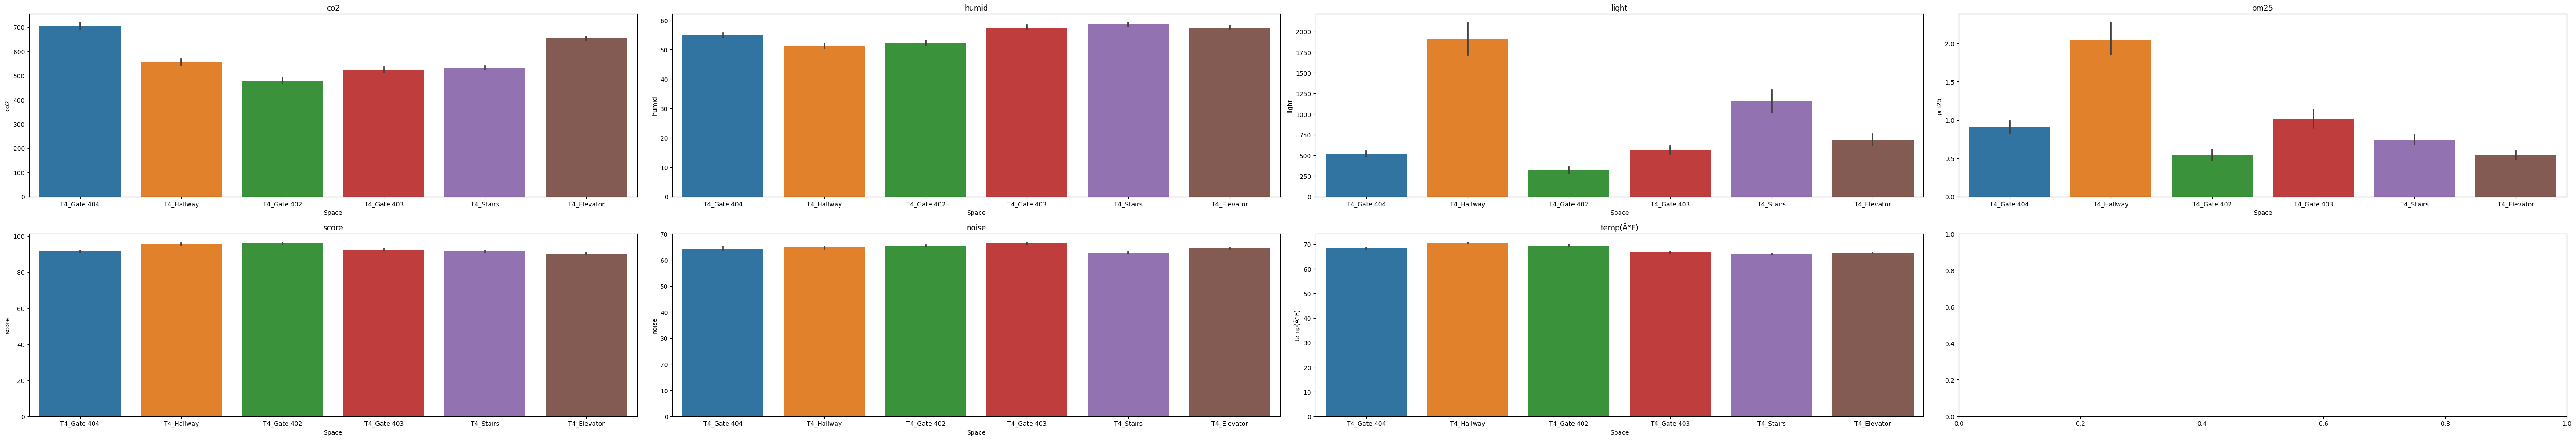

In [ ]:
# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the bar plot for each variable
    sns.barplot(x='Space', y=variable, data=df_T4_D1, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Space')
    ax.set_ylabel(variable)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-34-27e469fe16e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_T4_D1 = df_T4_D1.corr()


<Axes: >

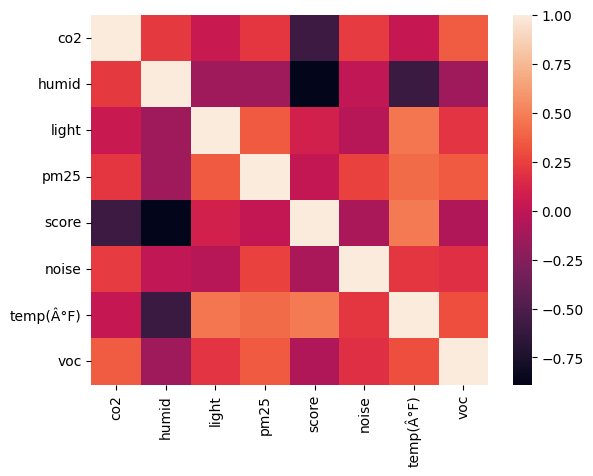

In [ ]:
# finding the correlation
corr_T4_D1 = df_T4_D1.corr()
sns.heatmap(corr_T4_D1)

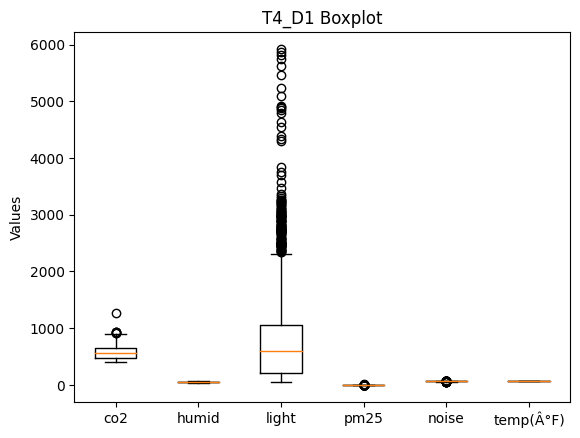

In [ ]:
columns_to_plot = ['co2', 'humid', 'light', 'pm25','noise', 'temp(Â°F)']
subset_df_T4_D1 = df_T4_D1[columns_to_plot]
# Create the boxplot
plt.boxplot(subset_df_T4_D1.values)
plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
plt.ylabel('Values')
plt.title('T4_D1 Boxplot')
plt.show()

In [ ]:
#Detect High Values
loi = np.where(df_T4_D1["co2"]>1000)[0]
dCO2_1 = df_T4_D1["Timeline"][loi]
dCO2_2 = df_T4_D1["co2"][loi]
dCO2_3 = df_T4_D1["Space"][loi]

In [ ]:
W= df_T4_D1
# Create a new column "loi" based on the condition
W["loi"] = np.where(W["co2"] > 1000, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_W = W[W["loi"] == 1]

In [ ]:
High_value_W

co2  humid  light  pm25  score  noise  temp(Â°F)    voc        Space  \
100  1261.5   48.4  511.5   0.8   88.3   62.5       71.6  140.0  T4_Gate 404   

               Timeline  loi  
100 2023-06-19 14:20:00    1

In [ ]:
High_value_W .to_excel("T4_D1_CO2_High.xlsx",
             sheet_name='Sheet_name_1')

In [ ]:
E_T4_D1= df_T4_D1
# Create a new column "loi" based on the condition
E_T4_D1["loi"] = np.where(E_T4_D1["noise"] > 70, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_E_T4_D1 = E_T4_D1[E_T4_D1["loi"] == 1]

In [ ]:
High_value_E_T4_D1

co2  humid    light  pm25  score  noise  temp(Â°F)     voc  \
227   710.60   58.2   173.40  1.20   90.0  71.00       69.4   49.20   
228   751.00   58.3   159.70  1.00   89.0  72.30       69.5   53.40   
229   794.40   58.2   178.60  1.80   89.0  71.50       69.7   32.40   
230   797.40   58.1   199.70  2.40   89.0  70.40       69.6   20.20   
313   427.00   53.7   671.90  1.00   96.0  73.40       71.3   20.70   
654   527.60   56.7  1994.90  1.40   94.0  70.70       69.7   30.30   
658   529.50   56.6  2409.30  3.10   94.0  70.30       69.8   33.40   
674   716.80   54.9  2214.70  2.60   91.0  71.00       71.2  102.60   
677   786.40   54.4  2913.50  4.00   90.7  70.60       71.6  123.50   
688   710.10   52.8  4391.30  3.30   92.4  73.00       72.4   80.50   
772   530.60   45.8   488.20  2.30   99.2  70.40       71.4   39.50   
773   590.80   45.8   403.40  3.10   97.7  73.60       71.4   47.20   
835   534.20   63.1   332.70  1.00   88.6  70.20       66.6   20.00   
837   568.40   62.8   360.20  1.00   88.0  71.10       66.6   20.00   
838   610.20   61.3   326.10  1.80   89.0  72.80       67.8   20.00   
840   669.80   58.8   373.00  1.60   90.0  71.30       68.8   20.00   
841   702.20   59.8   396.30  2.00   89.2  70.20       68.6   20.00   
865   592.60   60.7   605.80  3.20   90.0  72.00       66.7   23.20   
866   592.00   60.3   557.40  3.00   90.2  75.00       67.2   28.40   
879   595.20   61.9   607.00  1.20   88.4  70.20       67.5   34.20   
881   612.25   61.3   633.55  2.75   88.5  70.85       67.5   23.25   
882   631.00   60.4   664.30  3.00   89.0  72.30       67.7   20.00   
883   698.50   59.3   741.00  3.00   89.0  70.20       68.6   20.00   
884   722.40   58.7   747.30  2.00   89.4  70.70       69.0   20.00   
885   729.00   58.6   771.60  2.20   89.0  72.20       69.1   20.00   
948   568.00   49.6   809.00  1.00   96.0  71.30       68.6   20.00   
949   624.00   49.8   693.30  1.00   95.0  72.80       68.8   20.00   
950   651.00   48.7   585.70  2.00   96.0  73.80       69.3   20.00   
951   671.00   48.5   666.70  2.00   96.0  70.50       69.8   20.00   
952   661.00   49.2   751.20  2.00   95.0  72.30       69.2   29.00   
1043  813.50   59.9   353.70  1.50   87.8  75.10       68.4  107.50   
1044  829.00   59.8   353.00  1.80   86.8  73.40       68.6  157.00   
1045  849.30   59.3   357.10  1.80   87.0  75.90       68.9  158.30   
1046  898.20   58.9   372.70  1.80   86.7  72.80       69.2  150.60   
1047  938.10   58.8   383.40  2.10   86.0  72.10       69.4  132.60   
1086  858.00   57.1   613.00  1.60   87.4  73.60       70.5  153.40   
1087  907.90   56.7   671.30  2.80   86.8  73.00       70.8  231.40   
1098  768.20   58.1   809.70  1.10   89.0  70.70       69.7   70.00   
1148  737.20   46.5   810.50  2.60   96.0  70.20       70.1   58.10   
1152  817.00   46.6   761.30  1.60   94.6  72.80       70.7  111.00   
1153  809.00   47.1   696.10  1.20   94.8  72.60       70.6  104.00   
1154  846.00   47.3   575.80  1.00   94.0  71.60       70.6  124.80   
1155  813.80   47.6   586.80  1.00   93.8  72.40       70.2  151.00   
1157  809.00   48.5   449.10  1.00   93.2  74.60       69.9  167.00   
1158  827.00   48.3   674.00  1.20   94.1  71.80       70.0   85.90   

            Space  Timeline  loi  
227   T4_Gate 402  07:50:00    1  
228   T4_Gate 402  07:55:00    1  
229   T4_Gate 402  08:00:00    1  
230   T4_Gate 402  08:05:00    1  
313   T4_Gate 402  15:00:00    1  
654    T4_Hallway  09:15:00    1  
658    T4_Hallway  09:35:00    1  
674    T4_Hallway  10:55:00    1  
677    T4_Hallway  11:10:00    1  
688    T4_Hallway  12:05:00    1  
772    T4_Hallway  19:05:00    1  
773    T4_Hallway  19:10:00    1  
835   T4_Gate 403  07:15:00    1  
837   T4_Gate 403  07:25:00    1  
838   T4_Gate 403  07:30:00    1  
840   T4_Gate 403  07:40:00    1  
841   T4_Gate 403  07:45:00    1  
865   T4_Gate 403  09:45:00    1  
866   T4_Gate 403  09:50:00    1  
879   T4_Gate 403  10:55:00    1  
881   T

In [ ]:
High_value_E_T4_D1 .to_excel("T4_D1_Noise_High.xlsx",
             sheet_name='Sheet_name_1')

# **T4_D3_1**

In [ ]:
# Define start and end times
start_time = pd.Timestamp('2023-06-19 06:00:00')
end_time = pd.Timestamp('2023-06-19 23:00:00')

# Create a DatetimeIndex with 5-minute intervals
time_index = pd.date_range(start=start_time, end=end_time, freq='5T')

# Create a DataFrame with the timeline column
dt_3 = pd.DataFrame({'Timeline': time_index})
dt_3['time'] = dt_3['Timeline'].dt.time
dt_3.head()

Timeline      time
0 2023-06-19 06:00:00  06:00:00
1 2023-06-19 06:05:00  06:05:00
2 2023-06-19 06:10:00  06:10:00
3 2023-06-19 06:15:00  06:15:00
4 2023-06-19 06:20:00  06:20:00

In [ ]:
# Getting rid of current timeline and adding a new one to all the data files
# Set the directory path
directory = '/content/Sensor_Data_T4_D3_1'

# Get the list of files in the directory
files = os.listdir(directory)

# Iterate over each file in the directory
for file in files:
    # Check if the file is a xlsx file
    if file.endswith('.xlsx'):
        # Read the Excel file into a DataFrame
        file_path = os.path.join(directory, file)
        df_T4_D3_1 = pd.read_excel(file_path)

        # Drop the specified column from the DataFrame
        column_to_drop = 'timestamp(America/Chicago)'
        df_T4_D3_1 = df_T4_D3_1.drop(column_to_drop, axis=1)
        # Add a new column to the DataFrame
        df_T4_D3_1['Timeline'] = dt_3['time']

        # Save the modified DataFrame back to the file
        df_T4_D3_1.to_excel(file_path, index=False)


In [ ]:
import pandas as pd
import os

files = [file for file in os.listdir('/content/Sensor_Data_T4_D3_1')]

for file in files:
  print(file)


.ipynb_checkpoints
T4_Diagnostic3_Gate 407_33038.xlsx
T4_Diagnostic3_Gate 406_32076.xlsx
T4_Diagnostic3_Gate 405_32617.xlsx
T4_Diagnostic3_TSA_32603.xlsx


In [ ]:
directory = '/content/Sensor_Data_T4_D3_1'

# Create an empty list to store the dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):  # Adjust the file extension if necessary
        file_path = os.path.join(directory, filename)
        df_T4_D3_1 = pd.read_excel(file_path)
        dfs.append(df_T4_D3_1)

# Concatenate all the dataframes in the list
concatenated_df_T4_D3_1= pd.concat(dfs, ignore_index=True)

# Show the concatenated dataframe
print(concatenated_df_T4_D3_1)

        co2  humid  light  pm25  score  noise  temp(Â°F)   voc        Space  \
0     822.2   56.6  133.9   1.5   89.1   66.6       72.2  83.4  T4_Gate 407   
1    1055.4   54.0   60.6   3.1   87.8   69.5       72.1  55.7  T4_Gate 407   
2     873.9   57.8  109.9   1.5   87.9   67.5       71.5  69.8  T4_Gate 407   
3     746.9   58.0  136.2   1.6   89.3   68.3       71.0  70.5  T4_Gate 407   
4     725.3   57.9  136.4   1.4   90.0   66.6       71.0  46.1  T4_Gate 407   
..      ...    ...    ...   ...    ...    ...        ...   ...          ...   
815   738.1   58.5   67.8   0.5   89.0   69.0       68.8  89.2       T4_TSA   
816   735.3   58.8   69.0   0.4   89.0   66.5       68.7  73.6       T4_TSA   
817   731.4   58.7   68.9   0.4   89.0   67.2       68.7  64.7       T4_TSA   
818   728.9   58.7   69.0   0.5   89.0   66.9       68.7  60.6       T4_TSA   
819   727.0   58.7   68.9   0.3   89.0   67.1       68.7  56.3       T4_TSA   

     Timeline  
0    06:00:00  
1    06:05:00  
2  

In [ ]:
concatenated_df_T4_D3_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   co2        820 non-null    float64
 1   humid      820 non-null    float64
 2   light      820 non-null    float64
 3   pm25       820 non-null    float64
 4   score      820 non-null    float64
 5   noise      820 non-null    float64
 6   temp(Â°F)  820 non-null    float64
 7   voc        820 non-null    float64
 8   Space      820 non-null    object 
 9   Timeline   820 non-null    object 
dtypes: float64(8), object(2)
memory usage: 64.2+ KB


In [ ]:
concatenated_df_T4_D3_1.Space.unique()

array(['T4_Gate 407', 'T4_Gate 406', 'T4_Gate 405', 'T4_TSA'],
      dtype=object)

In [ ]:
for col in df_T4_D3_1.columns:
    print(col)

co2
humid
light
pm25
score
noise
temp(Â°F)
voc
Space
Timeline


In [ ]:
df_T4_D3_1 = concatenated_df_T4_D3_1

In [ ]:
# Create an empty dictionary to store the results
describe_results = {}

# Iterate over the columns and apply the describe() method
for column in df_T4_D3_1.columns:
    describe_results[column] = df_T4_D3_1.groupby('Space')[column].describe()

# Create a DataFrame for each column's describe results
rts = {column: pd.DataFrame(describe_results[column]).T for column in describe_results}

# Saving each DataFrame to separate files
for column, dt_3 in rts.items():
    dt_3.to_csv(f'{column}_describe.csv', index=False)

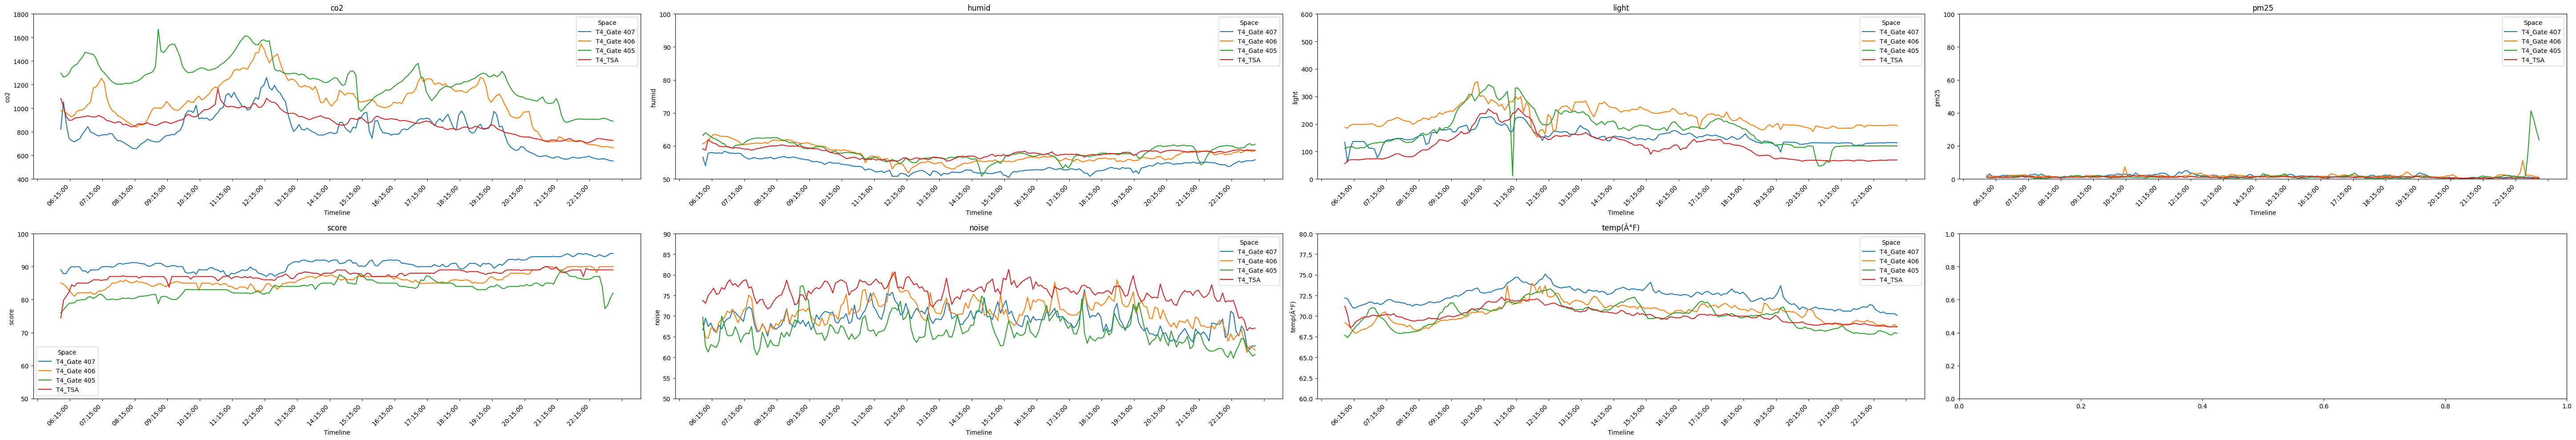

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()


# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the line plot for each variable
    sns.lineplot(data=df_T4_D3_1, x='Timeline', y=variable, hue='Space', ax=ax)

    # Set the x-axis format to show dates and hours
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=288))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))



    ax.set_title(variable)
    ax.set_xlabel('Timeline')
    ax.set_ylabel(variable)

    # Rotate the x-axis tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    # Set specific y-limits for each plot (adjust the values as needed)
    if variable == 'co2':
        ax.set_ylim(400, 1800)
    elif variable == 'humid':
        ax.set_ylim(50, 100)
    elif variable == 'light':
        ax.set_ylim(0, 600)
    elif variable == 'pm25':
        ax.set_ylim(0, 100)
    elif variable == 'score':
        ax.set_ylim(50, 100)
    elif variable == 'noise':
        ax.set_ylim(50, 90)
    elif variable == 'temp(Â°F)':
        ax.set_ylim(60, 80)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

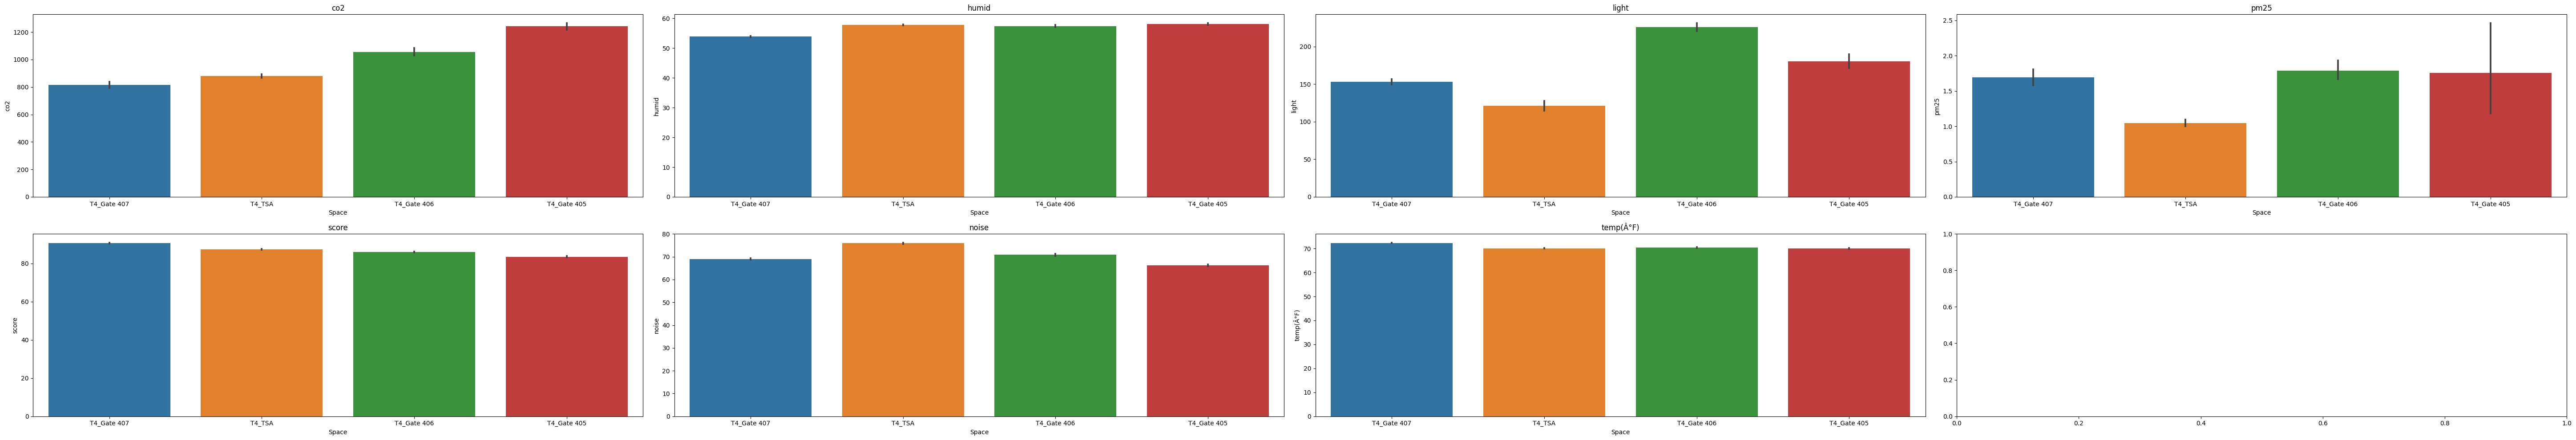

In [ ]:
# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the bar plot for each variable
    sns.barplot(x='Space', y=variable, data=df_T4_D3_1, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Space')
    ax.set_ylabel(variable)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-49-dc5c980148cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_T4_D3_1 = df_T4_D3_1.corr()


<Axes: >

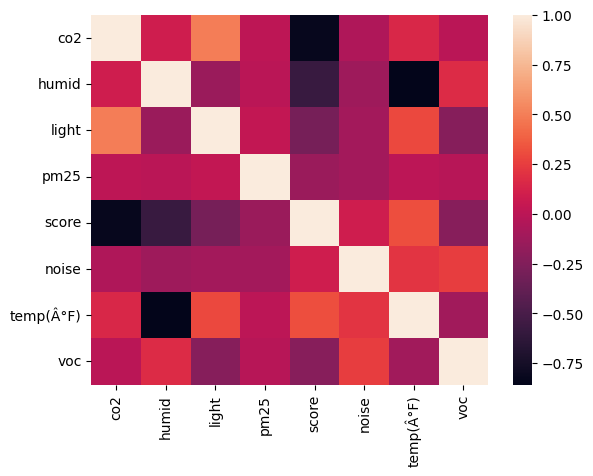

In [ ]:
# finding the correlation
corr_T4_D3_1 = df_T4_D3_1.corr()
sns.heatmap(corr_T4_D3_1)

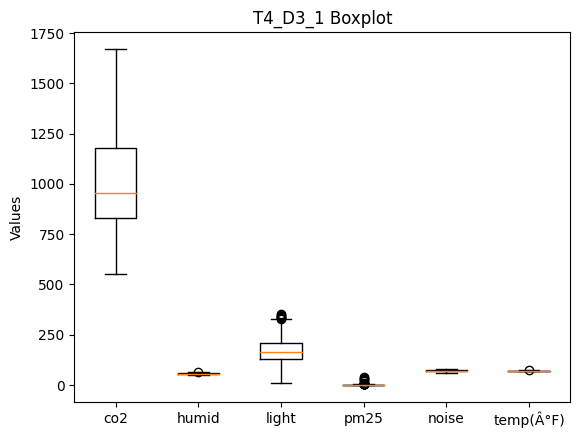

In [ ]:
columns_to_plot = ['co2', 'humid', 'light', 'pm25','noise', 'temp(Â°F)']
subset_df_T4_D3_1 = df_T4_D3_1[columns_to_plot]
# Create the boxplot
plt.boxplot(subset_df_T4_D3_1.values)
plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
plt.ylabel('Values')
plt.title('T4_D3_1 Boxplot')
plt.show()

In [ ]:
#Detect High Values
Q= df_T4_D3_1
# Create a new column "loi" based on the condition
Q["loi"] = np.where(Q["co2"] > 1000, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_Q = Q[Q["loi"] == 1]

In [ ]:
High_value_Q

co2  humid  light  pm25  score  noise  temp(Â°F)    voc        Space  \
1    1055.4   54.0   60.6   3.1   87.8   69.5       72.1   55.7  T4_Gate 407   
50   1025.4   54.8  222.3   2.4   87.7   68.3       72.9   72.4  T4_Gate 407   
60   1006.4   52.6  193.2   2.4   88.8   71.4       74.0   25.8  T4_Gate 407   
61   1108.4   53.0  172.4   2.2   87.4   73.4       74.2   30.0  T4_Gate 407   
62   1125.4   52.9  172.6   2.8   87.2   75.6       74.4   25.0  T4_Gate 407   
..      ...    ...    ...   ...    ...    ...        ...    ...          ...   
795  1041.0   60.1  103.2   0.4   85.0   62.1       68.4   20.1  T4_Gate 405   
796  1040.7   59.9  116.5   0.7   85.0   62.6       68.5   20.0  T4_Gate 405   
797  1047.4   58.8  118.3   1.1   84.7   65.4       68.5  139.0  T4_Gate 405   
798  1083.1   56.0  118.3   1.8   86.4   66.2       68.7   50.0  T4_Gate 405   
799  1029.1   54.3  119.8   1.5   87.9   65.3       68.8   20.0  T4_Gate 405   

     Timeline  loi  
1    06:05:00    1  
50   10:10:00    1  
60   11:00:00    1  
61   11:05:00    1  
62   11:10:00    1  
..        ...  ...  
795  21:00:00    1  
796  21:05:00    1  
797  21:10:00    1  
798  21:15:00    1  
799  21:20:00    1  

[370 rows x 11 columns]

In [ ]:
High_value_Q .to_excel("T4_D3_1_CO2_High.xlsx",
             sheet_name='Sheet_name_1')

In [ ]:
E_T4_D3_1= df_T4_D3_1
# Create a new column "loi" based on the condition
E_T4_D3_1["loi"] = np.where(E_T4_D3_1["noise"] > 70, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_E_T4_D3_1 = E_T4_D3_1[E_T4_D3_1["loi"] == 1]

In [ ]:
High_value_E_T4_D3_1

co2  humid  light  pm25  score  noise  temp(Â°F)   voc        Space  \
11    797.2   57.8  108.3   1.9   89.0   71.3       71.5  31.1  T4_Gate 407   
12    790.0   57.7   77.7   2.3   89.0   70.9       71.6  21.8  T4_Gate 407   
13    773.8   57.8   94.4   1.9   89.0   70.1       71.4  20.0  T4_Gate 407   
16    775.0   56.4  142.1   2.5   90.0   71.6       72.0  25.4  T4_Gate 407   
17    773.8   56.0  141.9   2.6   90.0   72.2       72.0  34.4  T4_Gate 407   
..      ...    ...    ...   ...    ...    ...        ...   ...          ...   
767  1246.0   57.6  143.6   0.4   84.0   70.7       70.1  60.8  T4_Gate 405   
774  1268.6   57.1  122.2   1.8   84.0   72.9       70.4  53.8  T4_Gate 405   
775  1285.9   57.5  124.7   1.4   83.9   71.1       70.4  52.1  T4_Gate 405   
776  1267.3   56.2  124.3   1.2   84.5   73.3       71.0  47.4  T4_Gate 405   
777  1281.0   56.5  126.5   1.6   84.1   70.4       71.1  64.8  T4_Gate 405   

     Timeline  loi  
11   06:55:00    1  
12   07:00:00    1  
13   07:05:00    1  
16   07:20:00    1  
17   07:25:00    1  
..        ...  ...  
767  18:40:00    1  
774  19:15:00    1  
775  19:20:00    1  
776  19:25:00    1  
777  19:30:00    1  

[422 rows x 11 columns]

In [ ]:
High_value_E_T4_D3_1.to_excel("T4_D3_1_Noise_High.xlsx",
             sheet_name='Sheet_name_1')

# **T4_D3_2**

In [ ]:
# Define start and end times
start_time = pd.Timestamp('2023-06-19 06:00:00')
end_time = pd.Timestamp('2023-06-19 23:00:00')

# Create a DatetimeIndex with 5-minute intervals
time_index = pd.date_range(start=start_time, end=end_time, freq='5T')

# Create a DataFrame with the timeline column
dt_4 = pd.DataFrame({'Timeline': time_index})
dt_4['time'] = dt_4['Timeline'].dt.time
dt_4.head()

Timeline      time
0 2023-06-19 06:00:00  06:00:00
1 2023-06-19 06:05:00  06:05:00
2 2023-06-19 06:10:00  06:10:00
3 2023-06-19 06:15:00  06:15:00
4 2023-06-19 06:20:00  06:20:00

In [ ]:
# Getting rid of current timeline and adding a new one to all the data files
# Set the directory path
directory = '/content/Sensor_Data_T4_D3_2'

# Get the list of files in the directory
files = os.listdir(directory)

# Iterate over each file in the directory
for file in files:
    # Check if the file is a xlsx file
    if file.endswith('.xlsx'):
        # Read the Excel file into a DataFrame
        file_path = os.path.join(directory, file)
        df_T4_D3_2 = pd.read_excel(file_path)

        # Drop the specified column from the DataFrame
        column_to_drop = 'timestamp(America/Chicago)'
        df_T4_D3_2 = df_T4_D3_2.drop(column_to_drop, axis=1)
        # Add a new column to the DataFrame
        df_T4_D3_2['Timeline'] = dt_4['time']

        # Save the modified DataFrame back to the file
        df_T4_D3_2.to_excel(file_path, index=False)


In [ ]:
import pandas as pd
import os

files = [file for file in os.listdir('/content/Sensor_Data_T4_D3_2')]

for file in files:
  print(file)


T4_Diagnostic3_Gate 410_33038.xlsx
T4_Diagnostic3_Gate 409_32617.xlsx
T4_Diagnostic3_Gate 408_ 32603.xlsx


In [ ]:
directory = '/content/Sensor_Data_T4_D3_2'

# Create an empty list to store the dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):  # Adjust the file extension if necessary
        file_path = os.path.join(directory, filename)
        df_T4_D3_2 = pd.read_excel(file_path)
        dfs.append(df_T4_D3_2)

# Concatenate all the dataframes in the list
concatenated_df_T4_D3_2= pd.concat(dfs, ignore_index=True)

# Show the concatenated dataframe
print(concatenated_df_T4_D3_2)

       co2  humid  light  pm25  score  noise  temp(Â°F)    voc        Space  \
0    822.2   58.7  131.5   0.8   87.9   69.4       70.4  119.5  T4_Gate 410   
1    773.5   59.7  134.8   0.8   88.0   62.3       69.9   76.3  T4_Gate 410   
2    759.5   60.5  135.6   0.8   88.0   61.3       69.6   43.0  T4_Gate 410   
3    755.6   61.2  135.6   0.7   87.1   60.5       69.2   25.7  T4_Gate 410   
4    752.0   61.7  135.4   0.4   86.6   61.6       69.0   20.7  T4_Gate 410   
..     ...    ...    ...   ...    ...    ...        ...    ...          ...   
610  552.3   61.0   96.9   1.1   90.3   66.3       68.2  131.3  T4_Gate 408   
611  554.9   60.9   97.0   1.1   90.2   64.6       68.3  135.0  T4_Gate 408   
612  560.0   60.9   97.4   1.0   90.1   64.8       68.3  141.1  T4_Gate 408   
613  577.2   60.8   97.2   0.9   89.7   65.6       68.4  150.5  T4_Gate 408   
614  586.4   60.9   97.3   0.8   89.2   65.7       68.4  151.0  T4_Gate 408   

     Timeline  
0    06:00:00  
1    06:05:00  
2  

In [ ]:
concatenated_df_T4_D3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   co2        615 non-null    float64
 1   humid      615 non-null    float64
 2   light      615 non-null    float64
 3   pm25       615 non-null    float64
 4   score      615 non-null    float64
 5   noise      615 non-null    float64
 6   temp(Â°F)  615 non-null    float64
 7   voc        615 non-null    float64
 8   Space      615 non-null    object 
 9   Timeline   615 non-null    object 
dtypes: float64(8), object(2)
memory usage: 48.2+ KB


In [ ]:
concatenated_df_T4_D3_2.Space.unique()

array(['T4_Gate 410', 'T4_Gate 409', 'T4_Gate 408'], dtype=object)

In [ ]:
for col in df_T4_D3_2.columns:
    print(col)

co2
humid
light
pm25
score
noise
temp(Â°F)
voc
Space
Timeline


In [ ]:
df_T4_D3_2 = concatenated_df_T4_D3_2

In [ ]:
# Create an empty dictionary to store the results
describe_results = {}

# Iterate over the columns and apply the describe() method
for column in df_T4_D3_2.columns:
    describe_results[column] = df_T4_D3_2.groupby('Space')[column].describe()

# Create a DataFrame for each column's describe results
rts = {column: pd.DataFrame(describe_results[column]).T for column in describe_results}

# Saving each DataFrame to separate files
for column, dt_4 in rts.items():
    dt_4.to_csv(f'{column}_describe.csv', index=False)

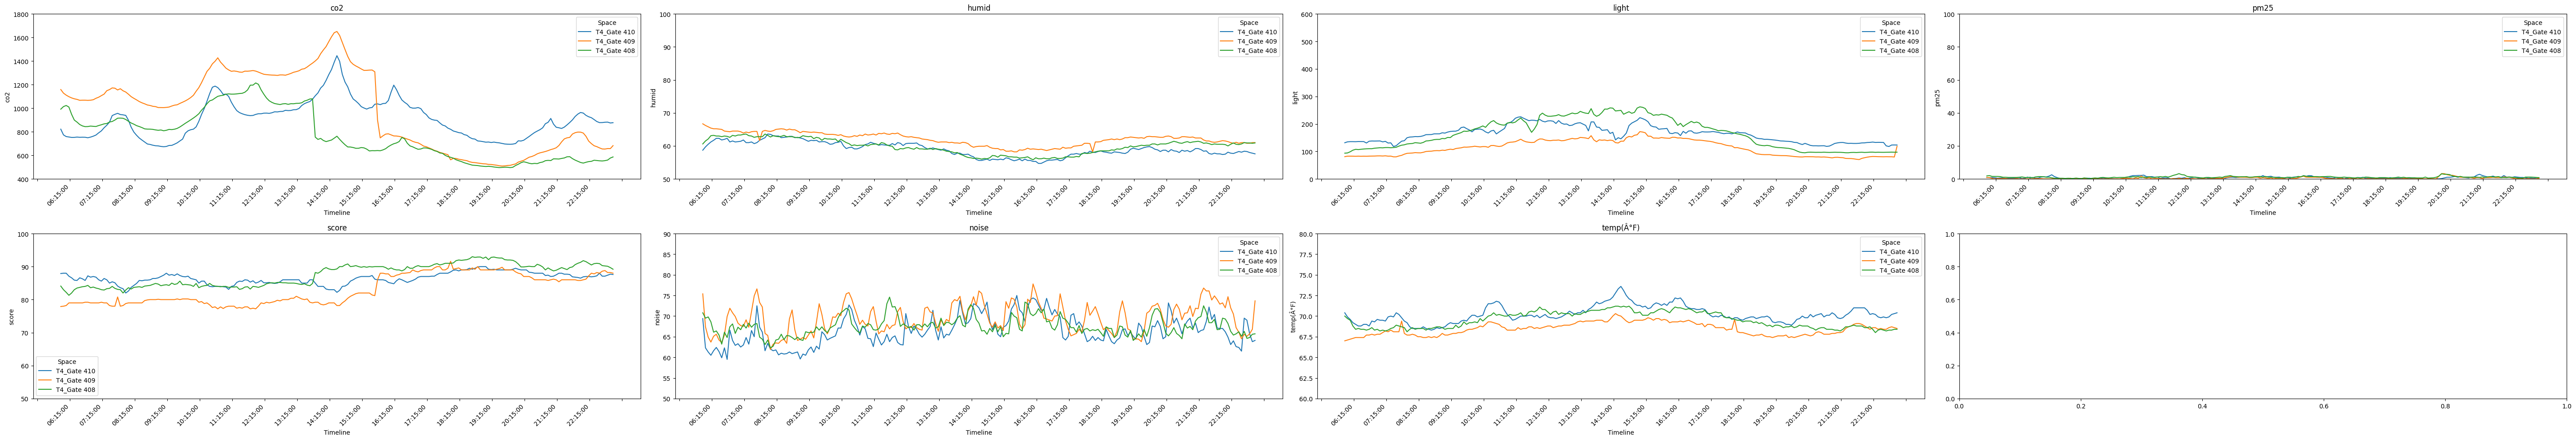

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()


# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the line plot for each variable
    sns.lineplot(data=df_T4_D3_2, x='Timeline', y=variable, hue='Space', ax=ax)

    # Set the x-axis format to show dates and hours
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=288))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))



    ax.set_title(variable)
    ax.set_xlabel('Timeline')
    ax.set_ylabel(variable)

    # Rotate the x-axis tick labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    # Set specific y-limits for each plot (adjust the values as needed)
    if variable == 'co2':
        ax.set_ylim(400, 1800)
    elif variable == 'humid':
        ax.set_ylim(50, 100)
    elif variable == 'light':
        ax.set_ylim(0, 600)
    elif variable == 'pm25':
        ax.set_ylim(0, 100)
    elif variable == 'score':
        ax.set_ylim(50, 100)
    elif variable == 'noise':
        ax.set_ylim(50, 90)
    elif variable == 'temp(Â°F)':
        ax.set_ylim(60, 80)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

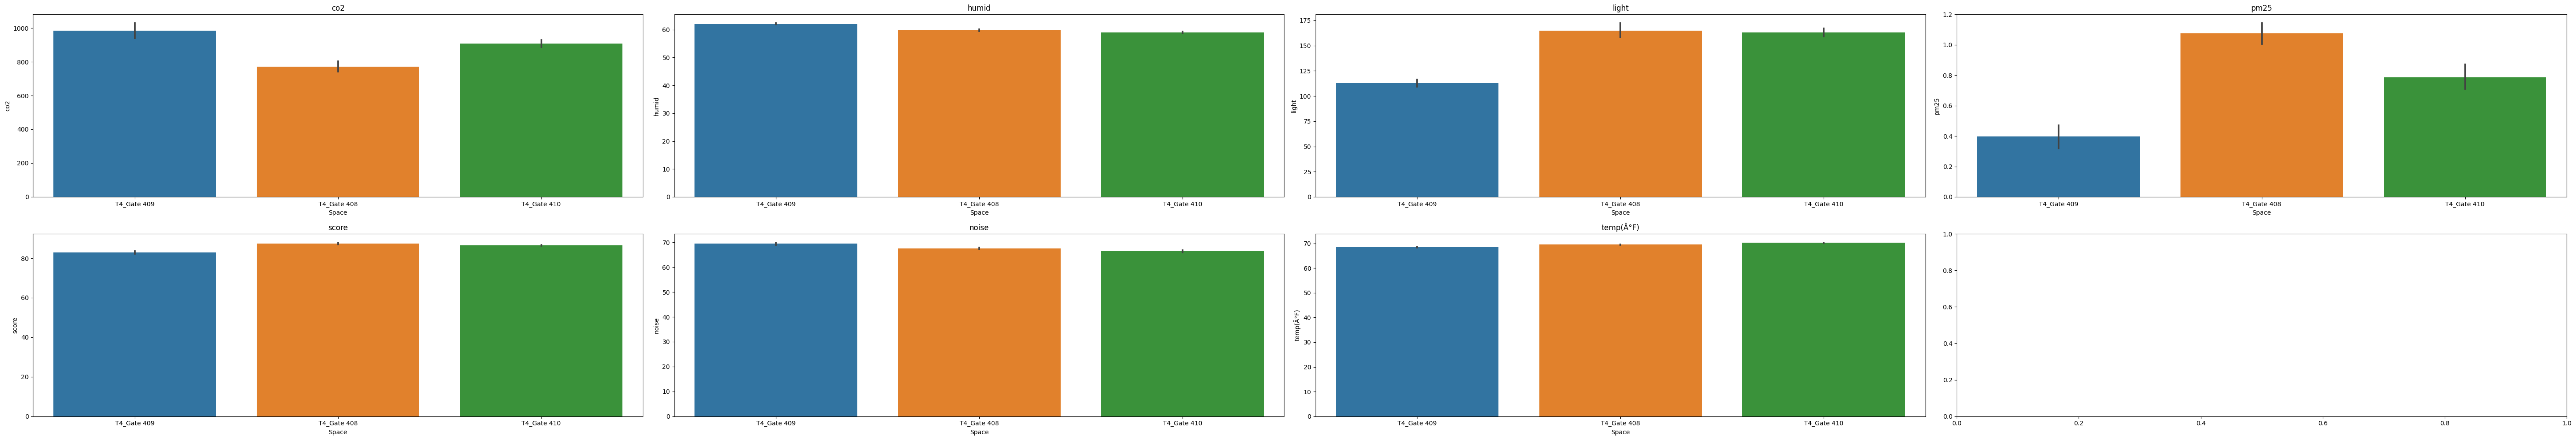

In [ ]:
# List of variables
variables = ['co2', 'humid', 'light', 'pm25', 'score', 'noise', 'temp(Â°F)']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 4

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(58, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the variables and corresponding axes
for i, (variable, ax) in enumerate(zip(variables, axes)):
    # Generate the bar plot for each variable
    sns.barplot(x='Space', y=variable, data=df_T4_D3_2, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Space')
    ax.set_ylabel(variable)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-68-328f93001040>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_T4_D3_2 = df_T4_D3_2.corr()


<Axes: >

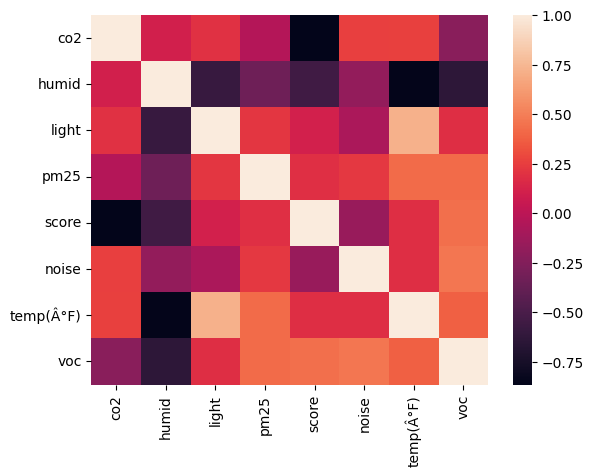

In [ ]:
# finding the correlation
corr_T4_D3_2 = df_T4_D3_2.corr()
sns.heatmap(corr_T4_D3_2)

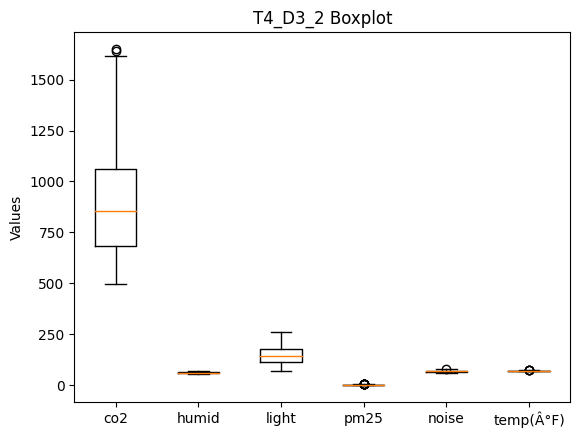

In [ ]:
columns_to_plot = ['co2', 'humid', 'light', 'pm25','noise', 'temp(Â°F)']
subset_df_T4_D3_2 = df_T4_D3_2[columns_to_plot]
# Create the boxplot
plt.boxplot(subset_df_T4_D3_2.values)
plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
plt.ylabel('Values')
plt.title('T4_D3_2 Boxplot')
plt.show()

In [ ]:
#Detect High Values
Y= df_T4_D3_2
# Create a new column "loi" based on the condition
Y["loi"] = np.where(Y["co2"] > 1000, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_Y = Y[Y["loi"] == 1]

In [ ]:
High_value_Y

co2  humid  light  pm25  score  noise  temp(Â°F)    voc        Space  \
0    1158.6   66.7   80.9   0.9   77.9   75.4       67.0  106.7  T4_Gate 409   
1    1127.9   66.2   82.7   0.8   78.0   67.4       67.1   66.9  T4_Gate 409   
2    1111.0   65.8   82.8   0.3   78.2   64.9       67.2   48.2  T4_Gate 409   
3    1097.8   65.4   82.7   0.0   79.0   63.7       67.3   30.4  T4_Gate 409   
4    1087.4   65.2   82.3   0.2   79.0   65.1       67.4   24.2  T4_Gate 409   
..      ...    ...    ...   ...    ...    ...        ...    ...          ...   
538  1033.8   55.7  174.8   0.4   85.2   72.1       70.9  263.0  T4_Gate 410   
539  1007.3   55.7  167.5   0.9   85.5   70.3       70.9  272.4  T4_Gate 410   
540  1000.7   55.8  166.3   0.5   85.8   71.6       70.8  214.0  T4_Gate 410   
541  1000.8   55.9  168.2   0.8   86.2   70.5       70.8  174.6  T4_Gate 410   
542  1005.6   55.5  171.7   0.0   86.8   69.8       70.9  156.4  T4_Gate 410   

     Timeline  loi  
0    06:00:00    1  
1    06:05:00    1  
2    06:10:00    1  
3    06:15:00    1  
4    06:20:00    1  
..        ...  ...  
538  16:40:00    1  
539  16:45:00    1  
540  16:50:00    1  
541  16:55:00    1  
542  17:00:00    1  

[215 rows x 11 columns]

In [ ]:
High_value_Y .to_excel("T4_D3_2_CO2_High.xlsx",
             sheet_name='Sheet_name_1')

In [ ]:
E_T4_D3_2= df_T4_D3_2
# Create a new column "loi" based on the condition
E_T4_D3_2["loi"] = np.where(E_T4_D3_2["noise"] > 70, 1, 0)

# Create a subset of the DataFrame where "loi" column equals 1
High_value_E_T4_D3_2 = E_T4_D3_2[E_T4_D3_2["loi"] == 1]

In [ ]:
High_value_E_T4_D3_2

co2  humid  light  pm25  score  noise  temp(Â°F)    voc        Space  \
0    1158.6   66.7   80.9   0.9   77.9   75.4       67.0  106.7  T4_Gate 409   
10   1066.6   64.3   83.1   0.0   79.2   71.9       67.8   28.8  T4_Gate 409   
11   1068.0   64.5   83.2   0.2   79.0   70.8       67.7   39.4  T4_Gate 409   
18   1158.0   64.3   80.3   0.2   78.2   71.1       68.1   20.0  T4_Gate 409   
19   1172.4   64.4   80.3   0.2   78.0   74.9       68.1   29.8  T4_Gate 409   
..      ...    ...    ...   ...    ...    ...        ...    ...          ...   
547   904.8   57.5  170.8   0.9   87.1   70.6       70.0  138.9  T4_Gate 410   
582   744.0   58.2  121.9   1.2   89.0   73.2       70.2  127.0  T4_Gate 410   
583   760.0   58.9  120.5   1.5   88.3   71.3       69.9  134.7  T4_Gate 410   
597   858.4   57.7  129.5   1.7   87.7   72.2       70.6  146.9  T4_Gate 410   
599   901.0   57.8  129.0   1.3   86.9   70.4       71.0  161.0  T4_Gate 410   

     Timeline  loi  
0    06:00:00    1  
10   06:50:00    1  
11   06:55:00    1  
18   07:30:00    1  
19   07:35:00    1  
..        ...  ...  
547  17:25:00    1  
582  20:20:00    1  
583  20:25:00    1  
597  21:35:00    1  
599  21:45:00    1  

[157 rows x 11 columns]

In [ ]:
High_value_E_T4_D3_2.to_excel("T4_D3_2_Noise_High.xlsx",
             sheet_name='Sheet_name_1')